## 5장-2절. RandomForest
- 설명
    - 배깅과 같은 매커니즘을 가지고 있지만 데이터 뿐만 아니라, 변수도 random하게 뽑아서 모델을 만드는 방법. 즉, base leaner 간의 공분산을 줄일 수 있다.
    - 배깅에서는 각 트리들은 중복되는 데이터를 다수 가지고 있기 때문에 독립이라는 보장이 없기 때문에 tree가 증가함에 따라 모델 전체의 분산이 증가할수도 있다
    - 각 tree간의 공분산을 줄일 수 있는 방법이 randomforest이다.
    - 뽑을 변수의 수는 하이퍼파라미터이고, 일반적으로 변수의 수의 루트값 사용
    - 일반적으로 bagging보다 성능이 좋다.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np

## 데이터불러오기

In [3]:
os.getcwd()

'C:\\Users\\rbtkd\\ADP_codingbook\\앙상블'

In [4]:
data = pd.read_csv("./data/otto_train.csv")
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

In [6]:
# id 변수 제거
data = data.drop(['id'], axis=1)

In [7]:
data.target.value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

In [8]:
mapping_target = {
    'Class_1' : 1,
    'Class_2' : 2,
    'Class_3' : 3,
    'Class_4' : 4,
    'Class_5' : 5,
    'Class_6' : 6,
    'Class_7' : 7,
    'Class_8' : 8,
    'Class_9' : 9,    
}

In [9]:
data['target'] = data['target'].apply(lambda x : mapping_target[x])
data.target.value_counts()

2    16122
6    14135
8     8464
3     8004
9     4955
7     2839
5     2739
4     2691
1     1929
Name: target, dtype: int64

In [10]:
feature_columns = list(data.columns.difference(['target']))

X = data[feature_columns]
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

---
---

## 01. 분류분석

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=20, max_depth=20,  max_features=10)
clf.fit(X_train,y_train)

pred_test = clf.predict(X_test)

accuracy_score(y_test,pred_test)

0.767560870502047

---
---

## 01-2 하이퍼파라미터튜닝

In [22]:
from sklearn.model_selection import GridSearchCV

hyperparms = {
    'n_estimators':[100],
    'max_depth':[10,20],
    'max_features':[8,9,10],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20],
}

gs = GridSearchCV(RandomForestClassifier(),
                 param_grid=hyperparms,
                 scoring='accuracy',
                 verbose=True,
                 n_jobs=-1)

In [23]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'max_features': [8, 9, 10],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]},
             scoring='accuracy', verbose=True)

In [24]:
print('GridSearchCV 최적 파라미터:',gs.best_params_)
print('GridSearchCV 최고 정확도:',gs.best_score_)
print('GridSearchCV 최고성능 모델:',gs.best_estimator_)

GridSearchCV 최적 파라미터: {'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
GridSearchCV 최고 정확도: 0.7648566838114618
GridSearchCV 최고성능 모델: RandomForestClassifier(max_depth=20, max_features=10, min_samples_leaf=8,
                       min_samples_split=8)


In [25]:
pred_test_gs = gs.predict(X_test)
accuracy_score(y_test,pred_test_gs)

0.7615815556992027

---
---

## 01-3 중요변수추출

In [26]:
best_model = gs.best_estimator_
f_i = best_model.feature_importances_
f_i_s = pd.Series(f_i, index=X_train.columns)
f_i_top20 = f_i_s.sort_values(ascending=False)[:20]
f_i_top20

feat_11    0.074424
feat_34    0.069776
feat_60    0.058841
feat_26    0.041373
feat_40    0.035847
feat_14    0.033872
feat_42    0.032139
feat_90    0.030953
feat_15    0.028280
feat_25    0.028122
feat_36    0.023338
feat_3     0.021328
feat_69    0.019374
feat_75    0.019290
feat_67    0.019158
feat_62    0.018929
feat_86    0.018756
feat_4     0.014859
feat_8     0.014495
feat_68    0.014368
dtype: float64

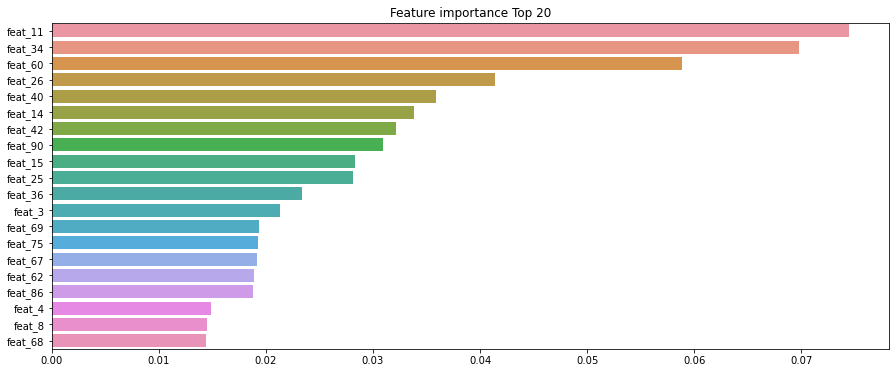

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,6))
plt.title('Feature importance Top 20')
sns.barplot(x=f_i_top20, y= f_i_top20.index)
plt.show()